<b>Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib as mpl
from matplotlib.lines import Line2D
import seaborn as sns
from typing import Callable

Font / Latex - Settings

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Times New Roman",
})

plt.rc('text.latex', preamble=r'\usepackage{amsmath, bm, mathrsfs, mathtools}')

<b>Custom Functions</b>

In [3]:
from dsa_functions import n_star
from dsa_functions import tau_life
from dsa_functions import calc_chi_powerlaw
from dsa_functions import calc_delta_powerlaw
from dsa_functions import read_in_dfs
from dsa_functions import plot_distr
from dsa_functions import print_stats

<b>Settings</b>

In [4]:
# Shift parameter
c = 30
# Follower distribution
alpha = 2.016
# Harm threshold -  20%
chi_ = 0.2
# Delta threshold - 24 hour
delta_ = 24 * 60 * 60

<b>Fits</b>

In [5]:
# Scipy solver - LBFGSB
# Window size - 2,500
# path_1 = '../fit-hawkes/output/pwl-fits-climatescam-2500-20230420-005817-L-BFGS-B.pkl'
# path_2 = '../fit-hawkes/output/pwl-fits-americafirst-2500-20230419-210339-L-BFGS-B.pkl'

# Window size - 5,000
# path_1 = '../fit-hawkes/output/pwl-fits-climatescam-5000-20230417-052218-L-BFGS-B.pkl'
# path_2 = '../fit-hawkes/output/pwl-fits-americafirst-5000-20230417-160137-L-BFGS-B.pkl'

# Window size - 10,000
# path_1 = '../fit-hawkes/output/pwl-fits-climatescam-10000-20230419-021301-L-BFGS-B.pkl'
# path_2 = '../fit-hawkes/output/pwl-fits-americafirst-10000-20230419-185203-L-BFGS-B.pkl'

# Scipy solver - trust-constr
# Window size - 5,000
# path_1 = '../fit-hawkes/output/old/pwl-fits-climatescam-5000-20230416-104440-trust-constr.pkl'
# path_2 = '../fit-hawkes/output/old/pwl-fits-americafirst-5000-20230415-111631-trust-constr.pkl'

path_1 = '../fit-hawkes/output/old/pwl-fits-climatescam-5000-20230416-104440-trust-constr.pkl'
path_2 = '../fit-hawkes/output/old/pwl-fits-americafirst-5000-20230415-111631-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-500-c-120-20230610-134217-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-500-c-120-20230610-134253-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-500-c-90-20230611-232253-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-500-c-90-20230611-231737-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-1000-c-30-20230610-135103-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-1000-c-30-20230610-135000-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-1000-c-90-20230611-231546-trust-constr.pkl',
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-1000-c-90-20230613-070245-trust-constr.pkl',
#     'processed/pwl-fits-processed-climatescam-1000-c-120-20230610-134618-trust-constr.pkl',
#     'processed/pwl-fits-processed-americafirst-1000-c-120-20230613-070410-trust-constr.pkl',
#     'processed/pwl-fits-processed-climatescam-2000-c-30-20230610-134518-trust-constr.pkl',
#     'processed/pwl-fits-processed-americafirst-2000-c-30-20230610-134234-trust-constr.pkl',
# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-2000-c-60-20230613-070338-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-2000-c-60-20230613-070203-trust-constr.pkl'
# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-2000-c-90-20230613-070312-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-2000-c-90-20230613-070147-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-1000-c-90-20230611-231546-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-1000-c-90-20230613-070245-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-2000-c-30-20230610-134518-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-2000-c-30-20230610-134234-trust-constr.pkl'
# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-5000-c-30-20230610-134327-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-5000-c-30-20230610-134839-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-1000-c-15-20230613-143524-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-1000-c-15-20230610-135017-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-1000-c-30-20230610-135103-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-1000-c-30-20230610-135000-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-500-c-30-20230610-134416-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-500-c-30-20230611-232316-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-2000-c-15-20230613-143551-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-2000-c-15-20230610-134345-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-climatescam-2000-c-30-20230610-134518-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-2000-c-30-20230610-134234-trust-constr.pkl'

# path_1 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-500-c-60-20230610-134636-trust-constr.pkl'
# path_2 = '../fit-hawkes/processed/pwl-fits-processed-americafirst-500-c-120-20230610-134253-trust-constr.pkl'

file_paths = [path_1, path_2]

In [6]:
df_all = read_in_dfs(
    file_paths=file_paths,
    only_best=True,
    alpha=alpha,
    c=c,
    delta_=delta_,
    chi_=chi_
)

Dataset: 1 - shape: (9050, 5)
File: ../fit-hawkes/output/old/pwl-fits-climatescam-5000-20230416-104440-trust-constr.pkl
Dataset: 1 - shape (only converged): (8325, 9)
Dataset: 1 - shape (only best loglikelihood): (182, 9)
Dataset: 1 - shape (stationary): (64, 12)
Dataset: 2 - shape: (5400, 5)
File: ../fit-hawkes/output/old/pwl-fits-americafirst-5000-20230415-111631-trust-constr.pkl
Dataset: 2 - shape (only converged): (4768, 9)
Dataset: 2 - shape (only best loglikelihood): (112, 9)
Dataset: 2 - shape (stationary): (100, 12)


In [7]:
df_all[0]

,guess,p_fit,loglike,solver,range,beta,kappa,theta,g_p,n_star,chi,delta,tau_
0,"[0.8388883611371006, 0.47893191825555526, 0.41...","[0.18418198797905627, 0.17229838227499597, 0.2...",-19405.079071,trust-constr,35,0.184182,0.172298,0.243325,False,0.378041,0.026401,1125.587285,487.930879
1,"[0.8388883611371006, 0.47893191825555526, 0.41...","[0.23300245014951465, 0.0708355364545717, 0.12...",-18940.531653,trust-constr,160,0.233002,0.070836,0.129552,False,0.456641,0.128844,347901.322511,6290.330755
2,"[0.40635204740490316, 0.49967492989277207, 0.4...","[0.01778751417190339, 1.3800439032312293, 0.39...",-16545.420390,trust-constr,122,0.017788,1.380044,0.396736,False,0.918405,0.079037,441240.758580,142.142215
3,"[0.029386988919800072, 0.4687551972738412, 0.0...","[0.19834099247726977, 0.11110733651150721, 0.1...",-20522.327523,trust-constr,148,0.198341,0.111107,0.186134,False,0.393817,0.054167,5044.010817,1212.776381
4,"[0.029386988919800072, 0.4687551972738412, 0.0...","[0.07171477183029229, 0.33919458147395504, 0.2...",-15501.347062,trust-constr,167,0.071715,0.339195,0.201146,False,0.915398,0.443355,604800.000000,911.226364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"[0.3399013829438021, 0.995202125898867, 0.6767...","[1.0388635099462533e-06, 0.8520980998141009, 0...",-23508.869685,trust-constr,84,0.000001,0.852098,0.308372,False,0.968085,0.388003,604800.000000,253.996999
60,"[0.37748751186899965, 0.05485143000532866, 0.9...","[0.06276117050084648, 0.31202304007855497, 0.1...",-18862.347906,trust-constr,91,0.062761,0.312023,0.190345,False,0.914484,0.472599,604800.000000,1114.514035
61,"[0.37748751186899965, 0.05485143000532866, 0.9...","[0.018268226028966005, 1.0552131260800024, 0.3...",-17663.206840,trust-constr,101,0.018268,1.055213,0.352384,False,0.919793,0.126367,604800.000000,184.480679
62,"[0.37748751186899965, 0.05485143000532866, 0.9...","[0.0565847805672639, 0.3329361086078585, 0.206...",-23232.593898,trust-constr,127,0.056585,0.332936,0.206322,False,0.847112,0.277135,604800.000000,833.283894


<b>Descriptive Statistics - Fits #climatescam</b>

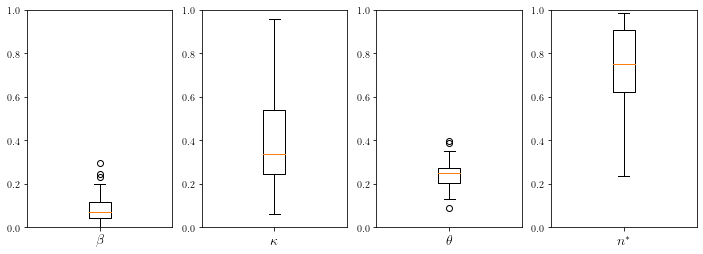

In [8]:
plot_distr(
    df_all=[df_all[0]]
)

<b>Descriptive Statistics - Fits #americafirst</b>

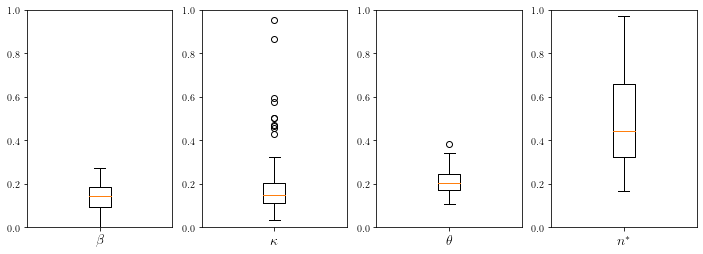

In [9]:
plot_distr(
    df_all=[df_all[1]]
)

<b>Merged Dataset - Fits #climatescam & #americafirst</b>

In [10]:
df_merged = pd.concat(df_all)
df_merged.shape

(164, 13)

In [11]:
print_stats(df=df_merged)

τ_1/2 - mean: 25.8 mins
τ_1/2 - median: 11.53 mins
n^star - mean: 0.59
n^star - median: 0.58
χ - mean: 14.77%
χ - median: 6.82%


In [12]:
df_merged.describe()

,loglike,range,beta,kappa,theta,n_star,chi,delta,tau_
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,-22105.620917,69.189024,0.121917,0.292743,0.225420,0.588693,0.147723,252633.089265,1547.944656
std,3425.551425,50.821783,0.067841,0.250849,0.057645,0.238614,0.174027,276873.606903,4912.775913
min,-28128.858627,0.000000,0.000001,0.035718,0.091220,0.168237,0.005267,0.000000,142.142215
25%,-24941.250155,26.750000,0.071157,0.125181,0.184617,0.392972,0.033070,2238.142265,402.079848
50%,-22801.101040,58.500000,0.116644,0.194936,0.217961,0.584034,0.068154,70681.737232,691.533034
75%,-19122.394583,100.250000,0.172900,0.382876,0.259866,0.786052,0.201390,604800.000000,1251.423343
max,-14561.048042,180.000000,0.297160,1.380044,0.396736,0.984304,0.825683,604800.000000,59836.181438


<b>Fits #climatescam</b>

In [13]:
print_stats(df=df_all[0])

delta_median = calc_delta_powerlaw(
    theta=np.median(df_all[0].theta.values),
    n=np.median(df_all[0].n_star.values),
    chi_=chi_,
    c=c
)

chi_median = calc_chi_powerlaw(
    theta=np.median(df_all[0].theta.values),
    n=np.median(df_all[0].n_star.values),
    delta_=delta_,
    c=c
)
print(f'Δ at centroid: {round(delta_median / 60 / 60, 2)} hours')
print(f'χ at centroid: {round(chi_median * 100, 2)}%')

τ_1/2 - mean: 28.32 mins
τ_1/2 - median: 7.48 mins
n^star - mean: 0.74
n^star - median: 0.75
χ - mean: 20.38%
χ - median: 12.48%
Δ at centroid: 168.0 hours
χ at centroid: 29.18%


In [14]:
df_all[0].describe()

,loglike,range,beta,kappa,theta,n_star,chi,delta,tau_
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-18960.331733,100.484375,0.090552,0.431775,0.244869,0.739561,0.203785,361384.163626,1699.469364
std,2419.002612,59.755053,0.063586,0.281834,0.059448,0.188086,0.192501,263018.312974,7448.098268
min,-23949.955327,2.000000,0.000001,0.061808,0.091220,0.237343,0.025003,64.004693,142.142215
25%,-20322.018734,34.750000,0.043188,0.246733,0.205156,0.624265,0.062610,67373.319228,349.155209
50%,-18805.411803,123.000000,0.072756,0.336622,0.250215,0.751503,0.124823,523020.379290,448.864809
75%,-17290.285286,147.250000,0.117000,0.539633,0.273259,0.909328,0.306433,604800.000000,850.711598
max,-14561.048042,180.000000,0.297160,1.380044,0.396736,0.984304,0.825683,604800.000000,59836.181438


<b>Fits #americafirst</b>

In [15]:
print_stats(df=df_all[1])

delta_median = calc_delta_powerlaw(
    theta=np.median(df_all[1].theta.values),
    n=np.median(df_all[1].n_star.values),
    chi_=chi_,
    c=c
)

chi_median = calc_chi_powerlaw(
    theta=np.median(df_all[1].theta.values),
    n=np.median(df_all[1].n_star.values),
    delta_=delta_,
    c=c
)
print(f'Δ at centroid: {round(delta_median / 60 / 60, 2)} hours')
print(f'χ at centroid: {round(chi_median * 100, 2)}%')

τ_1/2 - mean: 24.18 mins
τ_1/2 - median: 13.97 mins
n^star - mean: 0.49
n^star - median: 0.44
χ - mean: 11.18%
χ - median: 5.33%
Δ at centroid: 2.22 hours
χ at centroid: 13.29%


In [16]:
df_all[1].describe()

,loglike,range,beta,kappa,theta,n_star,chi,delta,tau_
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-24118.605995,49.160000,0.141990,0.203762,0.212973,0.492138,0.111843,183032.401674,1450.968843
std,2260.118812,30.691597,0.062943,0.180455,0.053114,0.217027,0.151494,263921.890259,2100.462727
min,-28128.858627,0.000000,0.000001,0.035718,0.108439,0.168237,0.005267,0.000000,151.634889
25%,-26062.334788,23.750000,0.095479,0.113191,0.169775,0.324105,0.023732,432.910279,474.190153
50%,-24484.229831,47.500000,0.145720,0.147431,0.206000,0.441525,0.053303,7556.705869,838.111060
75%,-22537.335480,72.250000,0.187079,0.204333,0.245661,0.658775,0.146791,604800.000000,1751.231190
max,-18181.376536,107.000000,0.274308,1.164230,0.384910,0.970464,0.758952,604800.000000,17882.417750


<b>Plot functions</b>

In [17]:
vfunc_delta_pwl = np.vectorize(calc_delta_powerlaw, otypes=[complex])
vfunc_chi_pwl = np.vectorize(calc_chi_powerlaw, otypes=[complex])

In [18]:
colors = ['springgreen', 'deeppink', 'dodgerblue']

plt.rcParams['font.size'] = 12

tick_y1 = 60 # 1 min
tick_y2 = 60 * 2 # 2 mins
tick_y3 = 4 * 60 # 4 mins
tick_y4 = 8 * 60 # 8 mins
tick_y5 = 15 * 60 # 15 mins
tick_y6 = 30 * 60 # 30 mins
tick_y7 = 60 * 60 # 60 mins
tick_y8 = 60 * 60 *2 # 120 mins

ticks_y = [tick_y1, tick_y2, tick_y3, tick_y4, tick_y5, tick_y6, tick_y7, tick_y8]
ticks_y_labels = ['1 min', '2 mins', '4 mins', '8 mins', '15 mins', '30 mins', '60 mins', '120 mins']

In [19]:
level_1 = 60 * 5 # 5 mins
level_2 = 60 * 15 # 15 mins
level_3 = 60 * 60 * 0.5 # 30 mins
level_4 = 60 * 60 # 60 mins
level_5 = 60 * 60 * 3 # 3 hours
level_6 = 60 * 60 * 6 # 6 hours
level_7 = 60 * 60 * 12 # 12 hours
level_8 = 60 * 60 * 24 # 24 hours

levels = [level_1, level_2, level_3, level_4, level_5, level_6, level_7, level_8]
z_tick_labels = ['5 mins', '15 mins', '30 mins', '60 mins', '3 hours', '6 hours', '12 hours', '24 hours']

nx = 1000
ny = 5000
# n-star
x = np.linspace(1e-2, 0.9999, nx)
# theta
y = np.linspace(0.1, 1, ny)
# half-life
y_tau = c * (2 ** (1 / y) - 1)

xv_calc, yv_calc = np.meshgrid(x, y)
xv, yv = np.meshgrid(x, y_tau)

z_values_delta = vfunc_delta_pwl(
    theta=yv_calc,
    n=xv_calc,
    chi_=chi_,
    c=c
)

<b>Deletion plot</b>

/usr/local/lib/python3.9/site-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
<ipython-input-20-acc3a1f3dcb9>:25: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(xv, yv, z_values_delta,


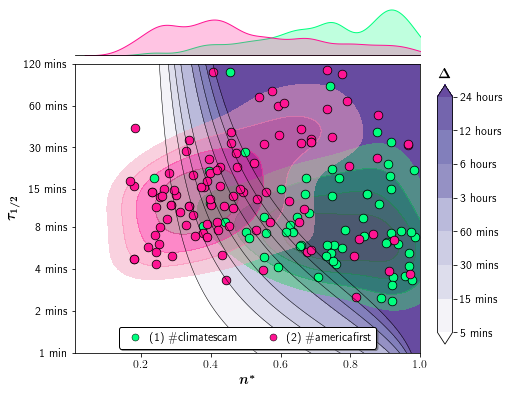

In [20]:
# Adjust color
cmap_p = mpl.cm.Purples(np.linspace(0, 1, 14))
cmap = mpl.colors.ListedColormap(cmap_p[1:10,:])
cmap.set_under('w')
cmap.set_over(cmap_p[10,:])

fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 1, height_ratios=(1, 6), left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.xaxis.set_ticks_position('none') 
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histx.spines['left'].set_visible(False)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.set_ylabel('')
ax_histx.set_yticks([])

cs = ax.contour(xv, yv, z_values_delta, 
                levels=levels, linewidths=0.5, colors='k')
cs = ax.contourf(xv, yv, z_values_delta, 
                 levels=levels, locator=ticker.LogLocator(), 
                 extend='both', cmap=cmap)

cbar_ax = fig.add_axes([0.94, 0.12, 0.035, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.set_yticklabels(z_tick_labels, fontsize=12)
cbar.ax.set_title(r'$\bm\Delta$', fontsize=14)

# Labels
ax.set_xlabel(r'$\bm{n^{*}}$', fontsize=14, fontweight='bold')
ax.set_ylabel(r'$\bm{\tau_{1/2}}$', fontsize=14)

for i, df in enumerate(df_all):
    sns.kdeplot(x=df.n_star.values, 
                y=df.tau_.values, color=colors[i],
                shade=True,
                log_scale=(False, True),
                levels=5, thresh=.3,
                alpha=0.5,
                ax=ax
               )
    sns.kdeplot(x=df.n_star, thresh=.1, fill=True, bw_adjust=0.5,
            color=colors[i], alpha=0.25, ax=ax_histx)


for i, df in enumerate(df_all):
    ax.scatter(df.n_star.values, 
               df.tau_.values, 
               c=colors[i],
               s=75,
               edgecolors='k',
               linewidths=0.75
              )

# Axis scaling
ax.set_xscale('linear')
ax.set_yscale('log')

# Limits
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(ticks_y[0], ticks_y[-1])
ax.set_yticks(ticks_y, ticks_y_labels)
ax.set_xlim(1e-2, 1)
handles, labels = ax.get_legend_handles_labels()

legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          markeredgecolor='k',
                          markeredgewidth=0.5,
                          label='(1) \#climatescam',
                          markerfacecolor=colors[0], 
                          markersize=7),
                   Line2D([0], [0], marker='o', color='w', 
                          markeredgecolor='k',
                          markeredgewidth=0.5,
                          label='(2) \#americafirst',
                          markerfacecolor=colors[1],
                          markersize=7)]
# plt.title(r'Targeted Harm Reduction: $\%$', x=0.5, y=1.05)
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.11),
          ncol=3, fancybox=True, edgecolor='k', shadow=True, handletextpad=0.1)
ax.minorticks_off()
plt.savefig('figures/delta_chi20p_deletion.pdf', facecolor='white', bbox_inches = 'tight')
plt.show()

<b>Harm plot</b>

In [21]:
level_1 = 0.05 # 5%
level_2 = 0.1 # 10%
level_3 = 0.15 # 15%
level_4 = 0.2 # 20%
level_5 = 0.25 # 25%
level_6 = 0.3 # 30%
level_7 = 0.4 # 40%
level_8 = 0.5 # 50%

levels = [level_1, level_2, level_3, level_4, level_5, level_6, level_7, level_8]
y_tick_labels = ['5\%', '10\%', '15\%', '20\%', '25\%', '30\%', '40\%', '50\%']

y_tau = c * (2 ** (1 / y) - 1)

xv_calc, yv_calc = np.meshgrid(x, y)
xv, yv = np.meshgrid(x, y_tau)


z_values_chi = vfunc_chi_pwl(
    theta=yv_calc,
    n=xv_calc,
    delta_=delta_,
    c=c
)

# Cutoff
z_values_chi[z_values_chi > 0.5] = 0.55

/usr/local/lib/python3.9/site-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


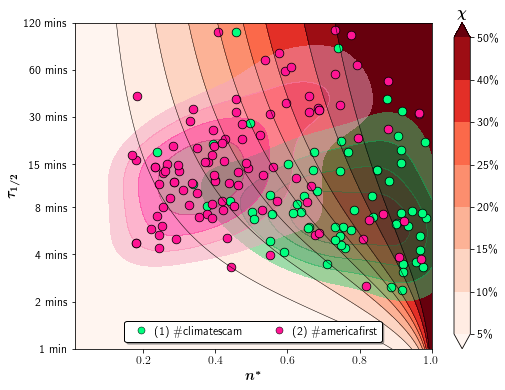

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

cs = ax.contour(xv, yv, z_values_chi, levels=levels, linewidths=0.5, colors='k')
cs = ax.contourf(xv, yv, z_values_chi, levels=levels, extend='both', cmap='Reds')

# Color bar
cbar = fig.colorbar(cs, ticks=levels)
cbar.ax.set_yticklabels(y_tick_labels, fontsize=12)
cbar.ax.set_title(r'$\bm\chi$', fontsize=14)

# Axis labels
plt.xlabel(r'$\bm{n^{*}}$', fontsize=14, fontweight='bold')
plt.ylabel(r'$\bm{\tau_{1/2}}$', fontsize=14)

# KDE plots
for i, df in enumerate(df_all):
    sns.kdeplot(x=df.n_star, 
                y=df.tau_, color=colors[i],
                shade=True,
                log_scale=(False, True),
                levels=5, thresh=.3,
                alpha=0.5)

# Scatter plots
for i, df in enumerate(df_all):
    ax.scatter(df.n_star.values, 
               df.tau_.values, 
               c=colors[i], 
               edgecolors='k',
               s=75,
               linewidths=0.75)

# Axis scaling
ax.set_xscale('linear')
ax.set_yscale('log')

# Limits
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(ticks_y[0], ticks_y[-1])
ax.set_yticks(ticks_y, ticks_y_labels)
ax.set_xlim(1e-2,1)

# Create custom legend
handles, labels = ax.get_legend_handles_labels()
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          markeredgecolor='k',
                          markeredgewidth=0.5,
                          label='(1) \#climatescam',
                          markerfacecolor=colors[0], 
                          markersize=7),
                   Line2D([0], [0], marker='o', color='w', 
                          markeredgecolor='k',
                          markeredgewidth=0.5,
                          label='(2) \#americafirst',
                          markerfacecolor=colors[1],
                          markersize=7)]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.105),
          ncol=3, fancybox=True, edgecolor='k', shadow=True, handletextpad=0.1)
ax.minorticks_off()
plt.savefig('figures/chi_delta24hour_deletion.pdf', facecolor='white', bbox_inches = 'tight')
plt.show()